In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
student_data = pd.read_csv('student_data/student_data.csv')

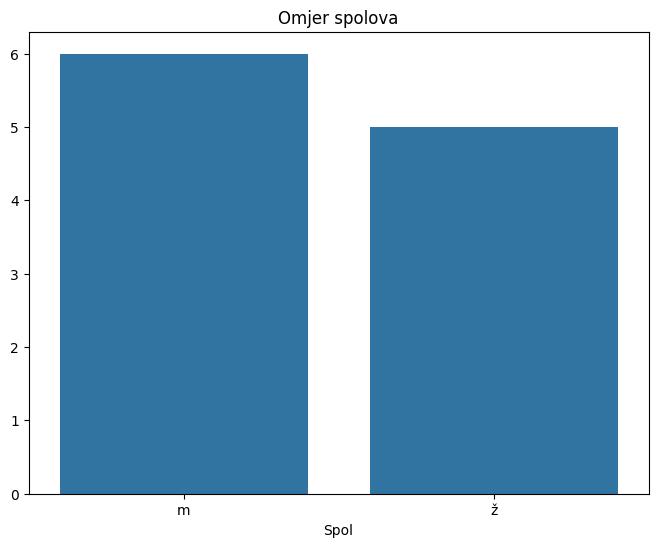

In [49]:
gender_counts = student_data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Omjer spolova')
plt.xlabel('Spol')
plt.show()

In [50]:
folder_path = 'student_data/'

for index, row in student_data.iterrows():
    filename = row['Grades']
    file_path = os.path.join(folder_path, filename)
    grades_data = pd.read_csv(file_path)
    print(grades_data.head())

                           Subject  Grade
0  Uvod u računala i programiranje      3
1                 Engleski jezik 1      4
2                 Engleski jezik 2      2
3                    Programiranje      2
4          Komunikacijske vještine      4
            Subject  Grade
0  1ngleski jezik 1      2
1  Engleski jezik 2      3
                           Subject  Grade
0                   Elektrotehnika      3
1  Uvod u računala i programiranje      4
2                 Engleski jezik 1      5
3                 Engleski jezik 2      4
4                     Matematlka 2      2
                              Subject  Grade
0                        Matematika 1      3
1             Osnove elektrotehnike 1      2
2            Računala i programiranje      2
3  Inženjerska grafika i prezentacija      5
4                        Matematika 2      4
                           Subject  Grade
0                         Fizika 1      2
1  Uvod u računala i programiranje      2
2                 E

In [51]:
unique_subjects = set()

for index, row in student_data.iterrows():
    filename = row['Grades']
    file_path = os.path.join(folder_path, filename)
    additional_data = pd.read_csv(file_path)
    
    unique_subjects.update(additional_data['Subject'].unique())

sorted_subjects = sorted(unique_subjects)
print("Unique Subjects (sorted alphabetically):")
for subject in sorted_subjects:
    print(subject)

Unique Subjects (sorted alphabetically):
1ngleski jezik 1
Algoritmi
Analiza mreža
Automatska regulacija 1
Automatska regulacija 2
Baze podataka
Bežične senzorske mreže
Digitalna elektronika
Digitalna instrumentacija 1
Ekonomika i organizacija proizvodnje
Elektrotehnika
Elektrotehnički materijali i tehnologije
Engleski jezik 1
Engleski jezik 2
Engleski jezik 2 1
Engleski jezik 2 3
Engleski jezik 3
Englšski jezik 2 3
Fizika 1
Fizika 2
Impulsni i digitalni sklopovi
Informacije i komunikacije
Inženjerska grafika i prezentacija
Komunikacijske vještine
Matematika 1
Matematika 2
Matematika 3
Matematlka 2
Objektno orijentirano programiranje
Objektno orijentirano programiranje 2
Osnove elektrotehnike 1
Osnove elektrotehnike 2
Programiranje
Programiranje za internet
Računala i programiranje
Simulacijsko modeliranje
Simulacijsko modeliranje 1
Teorija sustava
Uvod u računala i programiranje
Vjerojatnost i statistika


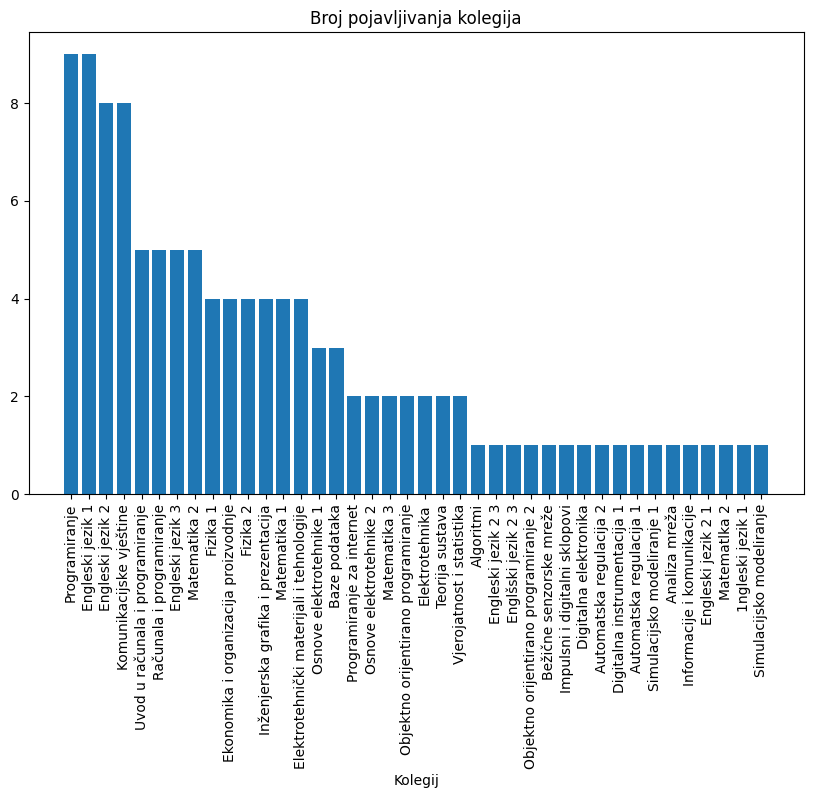

In [52]:
subject_counts = {}

for index, row in student_data.iterrows():
    filename = row['Grades']
    file_path = os.path.join(folder_path, filename)
    additional_data = pd.read_csv(file_path)
    for subject in additional_data['Subject']:
        subject_counts[subject] = subject_counts.get(subject, 0) + 1

subject_counts_df = pd.DataFrame(list(subject_counts.items()), columns=['Subject', 'Count'])
subject_counts_df = subject_counts_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(subject_counts_df['Subject'], subject_counts_df['Count'])
plt.title('Broj pojavljivanja kolegija')
plt.xlabel('Kolegij')
plt.xticks(rotation=90)
plt.show()

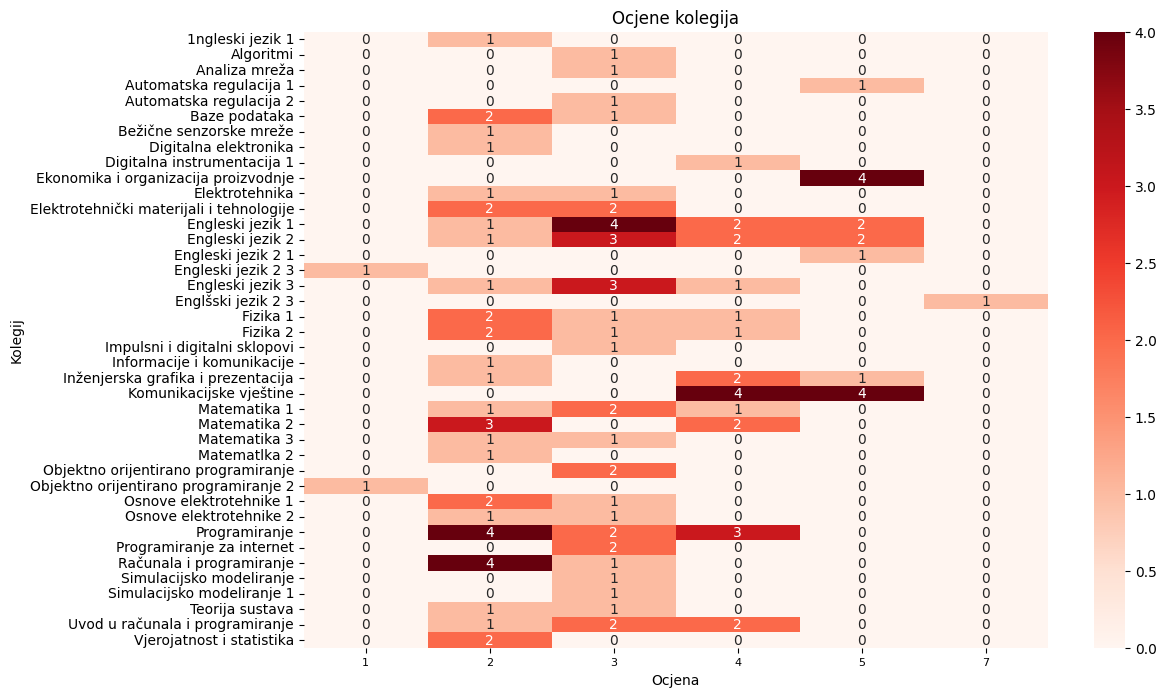

In [54]:
grades_data = pd.DataFrame()

for index, row in student_data.iterrows():
    filename = row['Grades']
    file_path = os.path.join(folder_path, filename)
    additional_data = pd.read_csv(file_path)
    grades_data = pd.concat([grades_data, additional_data], ignore_index=True)

pivot_table = grades_data.pivot_table(index='Subject', columns='Grade', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='d')
plt.title('Ocjene kolegija')
plt.xlabel('Ocjena')
plt.ylabel('Kolegij')

plt.xticks(fontsize=8)

plt.show()